In [93]:
# Name : Zahraa Ahmed Abdelkafy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the two CSV files into separate DataFrames
file1 = "C:/Users/zahra/Desktop/Oasis/Task2/datasets/Unemployment in India.csv"
file2 = "C:/Users/zahra/Desktop/Oasis/Task2/datasets/Unemployment_Rate_upto_11_2020.csv"
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Concatenate or merge the DataFrames based on common columns (Region and Date)
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df = pd.DataFrame(combined_df)
combined_df.columns = ["Region" , "Date" , "Frequency " , "Estimated_Unemployment_Rate(%)" ,
"Estimated_Employed" , "Estimated_Labour_Participation_Rate(%)" ,  "Area" , "Region.1" , "longitude" , "latitude"]


combined_df['Date'] = pd.to_datetime(combined_df['Date'].str.strip(), format='%d-%m-%Y')
combined_df =  combined_df.drop(columns=["Region.1", "longitude", "latitude"] )
print(combined_df)





              Region       Date Frequency   Estimated_Unemployment_Rate(%)  \
0     Andhra Pradesh 2019-05-31    Monthly                            3.65   
1     Andhra Pradesh 2019-06-30    Monthly                            3.05   
2     Andhra Pradesh 2019-07-31    Monthly                            3.75   
3     Andhra Pradesh 2019-08-31    Monthly                            3.32   
4     Andhra Pradesh 2019-09-30    Monthly                            5.17   
...              ...        ...        ...                             ...   
1030     West Bengal 2020-06-30          M                            7.29   
1031     West Bengal 2020-07-31          M                            6.83   
1032     West Bengal 2020-08-31          M                           14.87   
1033     West Bengal 2020-09-30          M                            9.35   
1034     West Bengal 2020-10-31          M                            9.98   

      Estimated_Employed  Estimated_Labour_Participation_Rate(%

In [94]:
column_types = combined_df.dtypes
print(column_types)

combined_df.dropna(inplace=True)
nan_values = combined_df.isna().sum()
print(nan_values)

Region                                            object
Date                                      datetime64[ns]
Frequency                                         object
Estimated_Unemployment_Rate(%)                   float64
Estimated_Employed                               float64
Estimated_Labour_Participation_Rate(%)           float64
Area                                              object
dtype: object
Region                                    0
Date                                      0
Frequency                                 0
Estimated_Unemployment_Rate(%)            0
Estimated_Employed                        0
Estimated_Labour_Participation_Rate(%)    0
Area                                      0
dtype: int64


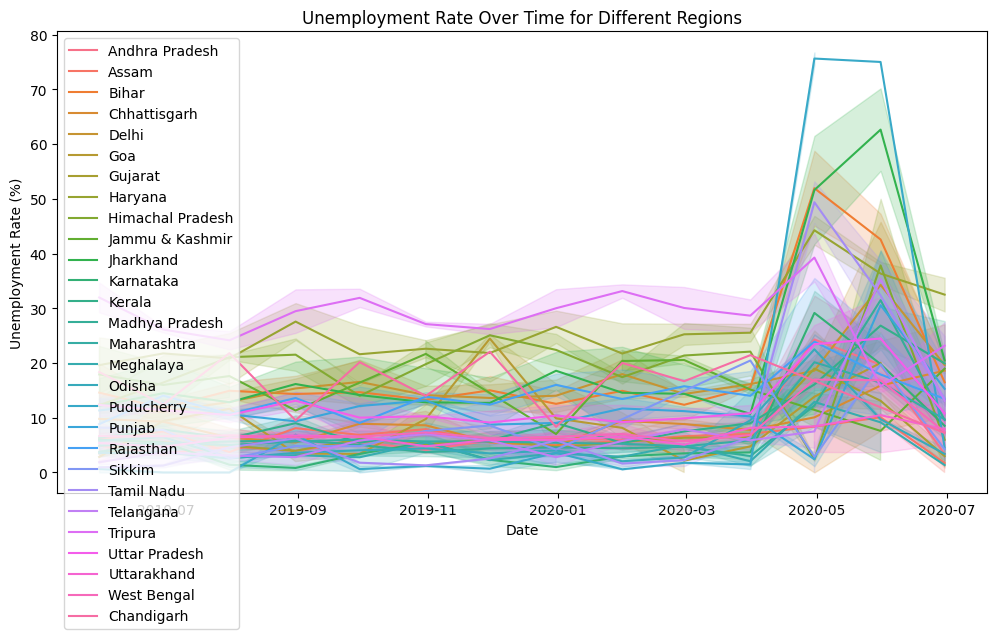

In [95]:
# Perform exploratory data analysis (EDA)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated_Unemployment_Rate(%)', hue='Region', data=combined_df)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time for Different Regions')
plt.legend(loc='upper left')
plt.show()


In [96]:
# Implementing Hypothesis Test.
from scipy.stats import ttest_ind

# Identify pre-Covid and Covid-19 periods (for illustration)
pre_covid_period = combined_df[combined_df['Date'] < pd.to_datetime('2020-01-01')]
covid_period = combined_df[combined_df['Date'] >= pd.to_datetime('2020-01-01')]

# Conduct the two-sample t-test
result = ttest_ind(pre_covid_period['Estimated_Unemployment_Rate(%)'], covid_period['Estimated_Unemployment_Rate(%)'])

# Interpret the results
if result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in unemployment rates between pre-Covid and Covid-19 periods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in unemployment rates between pre-Covid and Covid-19 periods.")

Reject the null hypothesis: There is a significant difference in unemployment rates between pre-Covid and Covid-19 periods.


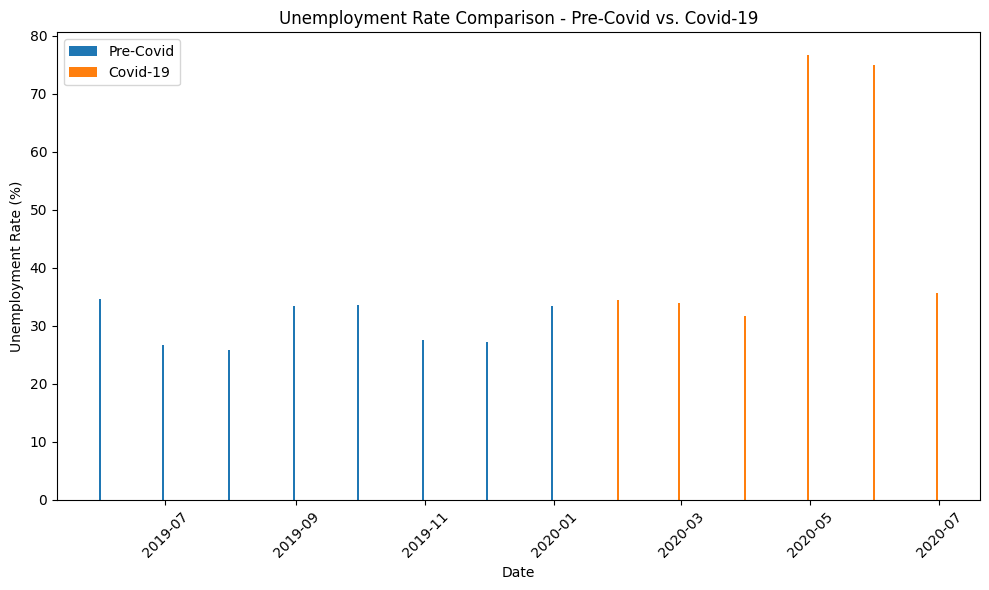

In [97]:
# Data Visualization - Bar plot to compare pre-Covid and Covid-19 periods
plt.figure(figsize=(10, 6))
plt.bar(pre_covid_period['Date'], pre_covid_period['Estimated_Unemployment_Rate(%)'], label='Pre-Covid')
plt.bar(covid_period['Date'], covid_period['Estimated_Unemployment_Rate(%)'], label='Covid-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Comparison - Pre-Covid vs. Covid-19')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

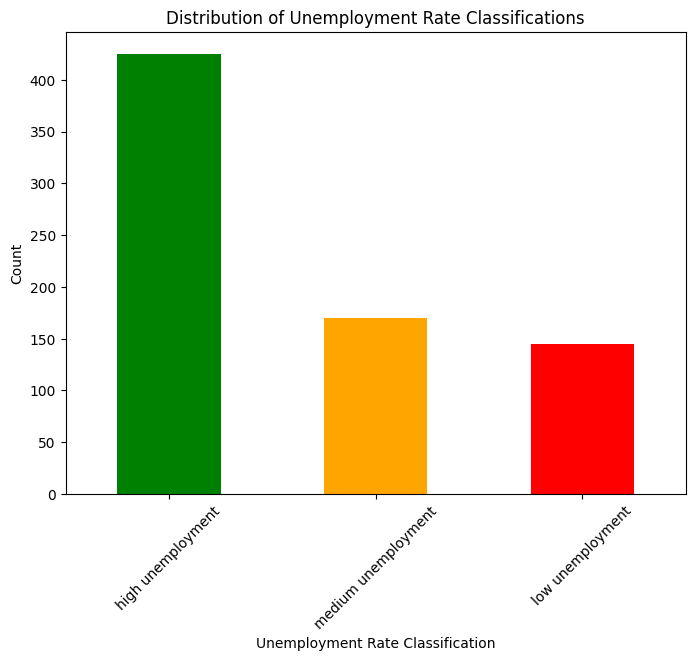

In [98]:
def classify_unemployment_rate(rate):
    if rate < 4:
        return 'low unemployment'
    elif rate >= 4 and rate < 7:
        return 'medium unemployment'
    else:
        return 'high unemployment'

# Prepare the data for modeling for Linear Regression
X = combined_df[['Estimated_Employed', 'Estimated_Labour_Participation_Rate(%)']].copy()  # Input features
y = combined_df['Estimated_Unemployment_Rate(%)'].apply(classify_unemployment_rate)  # Target variable 

# Calculate the count of each classification
classification_counts = y.value_counts()

# Create a bar chart for visualization
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.xlabel('Unemployment Rate Classification')
plt.ylabel('Count')
plt.title('Distribution of Unemployment Rate Classifications')
plt.xticks(rotation=45)
plt.show()